In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from skimage.color import gray2rgb
from skimage.transform import rotate
from skimage import img_as_float
import numpy as np

from dataset import get_dataset

In [2]:
world_map = imread('world_map.jpg')
world_map = img_as_float(world_map)

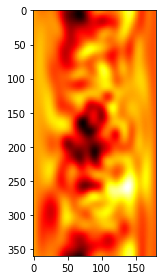

In [3]:
# Set input from arguments
lat = (-90.0, 89.0)
lon = (0.0, 359.0)
level = 50.0

# Get magnet dataset
ds = get_dataset(lat, lon, level)

# Tweak dataset's content to standart float format (all values between 0.0 and 1.0)
min = ds.min()
if min < 0:
    ds = ds + abs(min)
    
max = ds.max()
if max > 1:
    ds = ds / abs(max)

# Intermediate plot
imshow(ds, cmap='hot')

In [4]:
def prepare_shape(ds):
    prepared_ds = np.zeros((360, 180), dtype=float)
    prepared_ds[int(lon[0]):int(lon[1] + 1), int(lat[0] + 90.0):int(lat[1] + 91.0)] = ds
    
    return prepared_ds
    
prepared_ds = prepare_shape(ds)
prepared_ds = gray2rgb(prepared_ds)

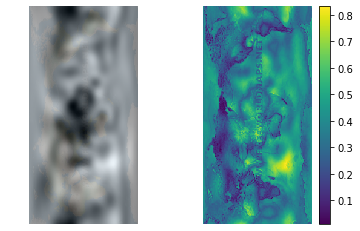

In [6]:
# Calculate the absolute difference on each channel separately
error_r = np.fabs(np.subtract(prepared_ds[:,:,0], world_map[:,:,0]))
error_g = np.fabs(np.subtract(prepared_ds[:,:,1], world_map[:,:,1]))
error_b = np.fabs(np.subtract(prepared_ds[:,:,2], world_map[:,:,2]))

# Create diff image
diff_img = np.maximum(np.maximum(error_r, error_g), error_b)

# Create Blended image
final = 0.9 * prepared_ds + 0.1 * world_map

# Plot images
fig, ax = plt.subplots()
ax.grid(False)
ax.axis('off')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

fig.add_subplot(1, 2, 1)
final = plt.imshow(final)
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(diff_img)
plt.colorbar()
plt.axis('off')

plt.savefig('color_map.jpg')

plt.show()